## Imports et configuration des kNNs

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

NOISE = 0.35 # Gaussian noise.
names = ["1NN", '3NN', '5NN', '7NN']

classifiers = [
        KNeighborsClassifier(n_neighbors=1),
        KNeighborsClassifier(n_neighbors=3),
        KNeighborsClassifier(n_neighbors=5),
        KNeighborsClassifier(n_neighbors=7),
    ]

## Scikit-learn 2D datasets

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=NOISE, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Les fonctions nécessaires à la visualisation des données

From: https://github.com/Menelau/synthetic_datasets:

In [3]:
def plot_dataset(X, y, ax=None, title=None, **params):
    """Plot a two dimensional dataset.

    Parameters
    ----------
    X : The data to be plotted

    y : Class label associated with each data point

    ax : Axis used to plot the data (Default = None)

    title : Title of the plot (Default = None)

    """
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', **params)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    if title is not None:
        ax.set_title(title)
    return ax


def make_grid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis grid

    y: data to base y-axis grid

    h: float, (Default = 0.02)
       step size to create the grid

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_classifier_decision(ax, clf, X, mode='line', **params):
    """Plot the decision border of a trained classifier.

    Parameters
    ----------
    ax : The axis use to plot the decision border

    clf : Classifier used in the plot. The classifier needs to implement the method predict(X) from sklearn

    X : array of shape = [n_samples, 2]
        The classification dataset considered in the plot

    mode : String, (Default = line)
           Weather to plot the decision boundary as a line or as colors

    **params : Other parameters used to change the plot

    Returns
    -------
    xx, yy : ndarray
    """
    xx, yy = make_grid(X[:, 0], X[:, 1])

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if mode == 'line':
        ax.contour(xx, yy, Z, **params)
    else:
        ax.contourf(xx, yy, Z, **params)
    ax.set_xlim((np.min(X[:, 0]), np.max(X[:, 0])))
    ax.set_ylim((np.min(X[:, 1]), np.max(X[:, 0])))

def plot_classifier_probability_map(ax, clf, X, **params):
    """Plot the decision border of a trained classifier.

    Parameters
    ----------
    ax : The axis use to plot the decision border

    clf : Classifier used in the plot. The classifier needs to implement the method predict(X) from sklearn

    X : array of shape = [n_samples, 2]
        The classification dataset considered in the plot

    **params : Other parameters used to change the plot

    Returns
    -------
    xx, yy : ndarray
    """
    xx, yy = make_grid(X[:, 0], X[:, 1])

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, **params)
    ax.set_xlim((np.min(X[:, 0]), np.max(X[:, 0])))
    ax.set_ylim((np.min(X[:, 1]), np.max(X[:, 0])))


# Visualisation

<AxesSubplot:title={'center':'Two Moons Dataset'}, xlabel='Feature 1', ylabel='Feature 2'>

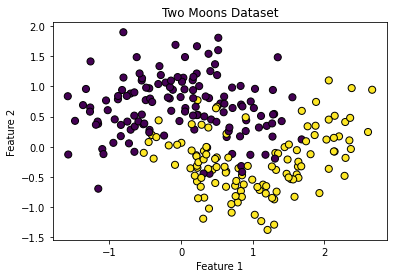

In [10]:
plot_dataset(X_train, y_train, title='Two Moons Dataset')

## Plotting

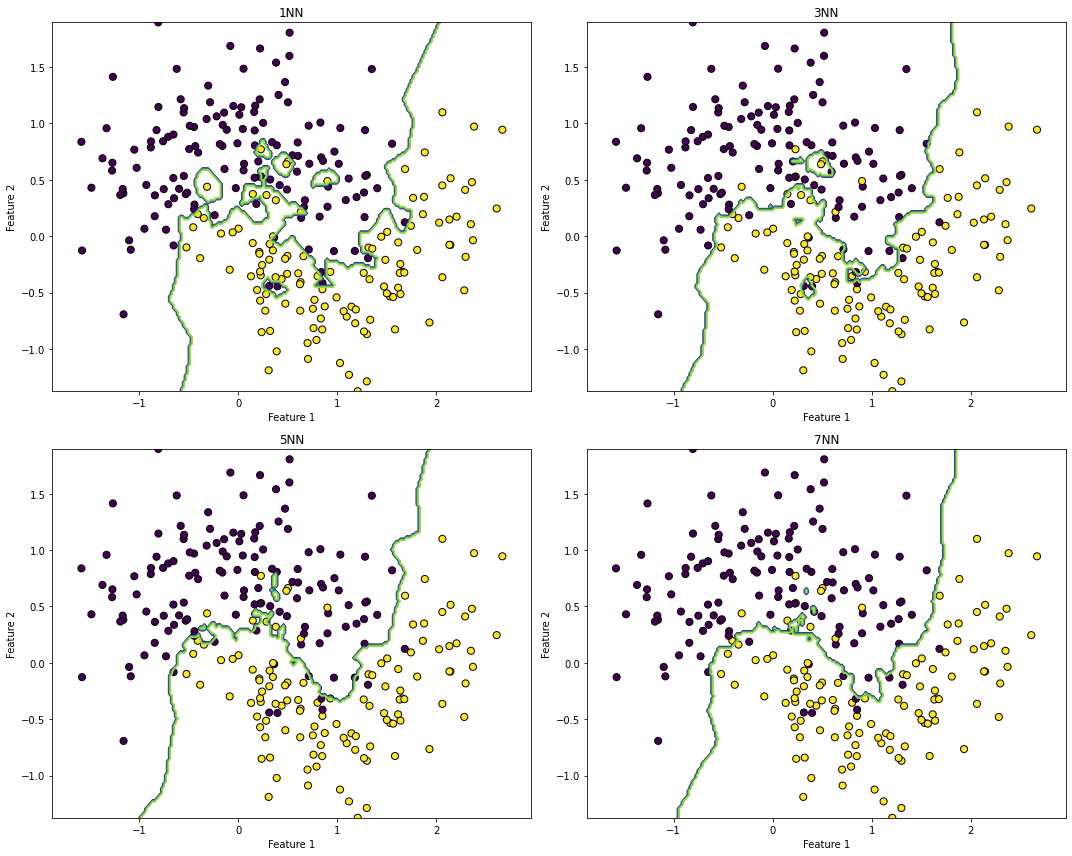

In [11]:
fig, sub = plt.subplots(2,2,figsize=(15,12))
for clf, title, ax in zip(classifiers, names, sub.flatten()):
    clf.fit(X_train, y_train)
    plot_dataset(X_train, y_train, ax, title)
    plot_classifier_decision(ax, clf, X_train)
    ax.set_xlim(np.min(X[:, 0]), np.max(X[:, 0]))
    ax.set_ylim(np.min(X[:, 1]), np.max(X[:, 1]))
plt.tight_layout()
plt.savefig('KNN result.jpg', dpi=450)
plt.show()

Nous observons ici le problème de sur-ajustement lorsque k=1. Voyez comment sa performance est beaucoup plus faible par rapport aux autres valeurs de k. Remarquez comment la frontière de décision devient plus lisse lorsque la valeur de k augmente.

## kNN Performance on Test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
for clf, name in zip(classifiers, names):
    print(f"Score {name}: {clf.score(X_test, y_test)}")

Score 1NN: 0.812
Score 3NN: 0.836
Score 5NN: 0.836
Score 7NN: 0.824


Parce que k=1 "overfit the data", sa performance dans l'ensemble de test est plus faible